# Price Prediction Of Apples Per Kilogram

In [1]:
# Import libraries we need to work with
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
# Load the data as a Pandas DataFrame
# Note that the data was already split into train and test
df_train = pd.read_csv('df-train_set.csv') # remember to push the dataset folder to git and update your path to a git one
df_test  = pd.read_csv('df-test_set.csv')

In [3]:
# view the top 5 rows of the training data
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
# Get the number of rows and columns of the data
df_train.shape

(64376, 13)

The data contains **64376 rows** along with **13 features.**

In [5]:
# Get a quick description of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Looking at our columns we can see the number and datatypes of features we are working with. The list of **features** we have are:
- Province    (categorical)
- Container   (categorical)
- Size_Grade  (categorical)
- Weight_Kg
- Commodities (categorical)
- Date        (interval)
- Low_Price
- High_Price
- Sales_Total
- Total_Qty_Sold
- Total_Kg_Sold
- Stock_On_Hand
- avg_price_per_kg

There are **no null values** in the dataset and there are **5 non numeric values.**

In [6]:
# Summary of numerical attributes in train data set
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [7]:
# Determine the skewness of data i.e how spread symmetrical the data is
df_train.skew()

Weight_Kg           10.746241
Low_Price           10.071797
High_Price           9.519075
Sales_Total          7.372393
Total_Qty_Sold       9.448153
Total_Kg_Sold        7.171355
Stock_On_Hand       13.767932
avg_price_per_kg          NaN
dtype: float64

Since the skew values of all the numerical columns (except for avg_price_per_kg) are greater than 1, the columns  are **skewed to the right.**

In [8]:
# Determine the kurtosis of the data i.e the measure of outliers present in the data
df_train.kurtosis()

Weight_Kg           116.022033
Low_Price           123.977754
High_Price          109.763276
Sales_Total          89.378966
Total_Qty_Sold      152.646835
Total_Kg_Sold        83.222862
Stock_On_Hand       437.075702
avg_price_per_kg           NaN
dtype: float64

Since the kurtosis values of all the numerical columns (except for avg_price_per_kg) are greater than 3, the columns  have a **large number of outliers.**

In [9]:
# Check for correlations between variables using the standard correlation coeffecient Pearson's r
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.832214,0.846184,0.007710,-0.055573,0.032639,-0.039879,-0.054991
Low_Price,0.832214,1.000000,0.962504,-0.006438,-0.093333,-0.031281,-0.062260,0.124585
High_Price,0.846184,0.962504,1.000000,0.029433,-0.082580,-0.000889,-0.046742,0.123440
Sales_Total,0.007710,-0.006438,0.029433,1.000000,0.750116,0.920337,0.265030,-0.000303
Total_Qty_Sold,-0.055573,-0.093333,-0.082580,0.750116,1.000000,0.735714,0.347718,-0.037589
Total_Kg_Sold,0.032639,-0.031281,-0.000889,0.920337,0.735714,1.000000,0.236541,-0.077350
Stock_On_Hand,-0.039879,-0.062260,-0.046742,0.265030,0.347718,0.236541,1.000000,-0.025811
avg_price_per_kg,-0.054991,0.124585,0.123440,-0.000303,-0.037589,-0.077350,-0.025811,1.000000


write what you observed from the above

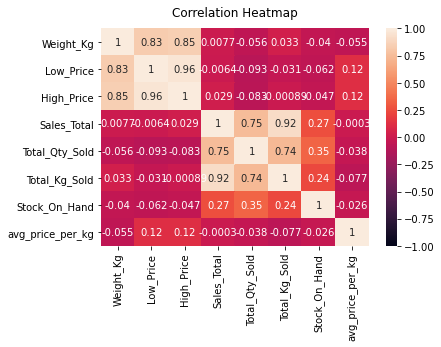

In [10]:
# Representing a graphical relationship between features using a heatmap
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
# obervations of the above diagram

In [12]:
# check for relationships of categorical variables

In [11]:
# Check how much each value correlates with the avg_price_per_kg
# using the standard correlation coefficient i.e Pearson's r 
corr_matrix = df_train.corr()
corr_matrix['avg_price_per_kg'].sort_values(ascending = False)
# come back to this one..you can use it for your features

avg_price_per_kg    1.000000
Low_Price           0.124585
High_Price          0.123440
Sales_Total        -0.000303
Stock_On_Hand      -0.025811
Total_Qty_Sold     -0.037589
Weight_Kg          -0.054991
Total_Kg_Sold      -0.077350
Name: avg_price_per_kg, dtype: float64

Using the standard correlation (Pearson's r) we observe that : 
- there is a weak **positive correlation** between **Low_Price** and   **avg_price_per_kg** as well as **High_Price** and **avg_price_per_kg.** 
- there is a **weak negative correlation** between the **Sales_Total** and **avg_price_per_kg**

In [12]:
df_train=df_train.drop(columns = 'Date')

In [13]:
# count number of inf values
count_inf = np.isinf(df_train['avg_price_per_kg']).values.sum()
median_ = df_train['avg_price_per_kg'].median()
median_

6.0

In [14]:
#replace positive inf values with the median
df_train['avg_price_per_kg'] = df_train['avg_price_per_kg'].replace([np.inf,-np.inf],median_)

In [15]:
df_train_c = df_train.copy() #create a copy of the train dataframe
df_train_c = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [17]:
# Dummy variable encoding
df_train_dummies = pd.get_dummies(df_train_c,drop_first = True)

#place dependent variable to last column
column_names = [col for col in df_train_dummies.columns if col != 'avg_price_per_kg'] + ['avg_price_per_kg']

df_train_dummies = df_train_dummies.reindex(columns = column_names)
df_train_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,1,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,1,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,1,0,0,0,0,0,0,0,4.50


In [18]:
### Variable selection by Correlation and Significance

In [18]:
# Check how much each value correlates with the avg_price_per_kg
# using the standard correlation coefficient i.e Pearson's r 
corr = df_train_dummies.corr()['avg_price_per_kg'].sort_values(ascending = False)
#corr

In [19]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

columns_ = [col for col in corr.index if col != 'avg_price_per_kg']

for col in columns_:
    p_val = round(pearsonr(df_train_dummies[col], df_train_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corr[col],
                    'P_Value':p_val}   

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')

# NOTE: we still need to discard columns
# for a 5% signifance value, we can infer that the below features are significant
df_cp_sorted[df_cp_sorted['P_Value']<0.05]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


In [20]:
# for a 1% signifance value, we can infer that the below features are significant
df_cp_sorted[df_cp_sorted['P_Value']<0.01]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


In [21]:
# for a 15% signifance value, we can infer that the below features are significant
df_cp_sorted[df_cp_sorted['P_Value']<0.15]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000
